# Part 2 - Data Visualization

## This script includes the following points:

1. Importing Data
2. Creating Visualizations
3. Creating a Histogram: Sales and order_hour_of_day
4. Distribution of orders among customers in terms of loyalty
5. Difference in expenditure based on the hour of the day
6. Connection between age and family (line)
7. Connection between age and income (scatterplot)

## 01. Importing Data

In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# defining path

path = r'/Users/robson/Desktop/CareerFoundry/Data Immersion/Achivement 4/19-04-2024 Instacart Basket Analysis'

In [5]:
#import dataframe

df = pd.read_pickle(os.path.join(path, '02 Data', 'prepared_data', 'ords_prods_customer_merge.pkl'))

## 02. Creating Visualizations

### 01. Bar Chart

Text(0, 0.5, 'Frequency')

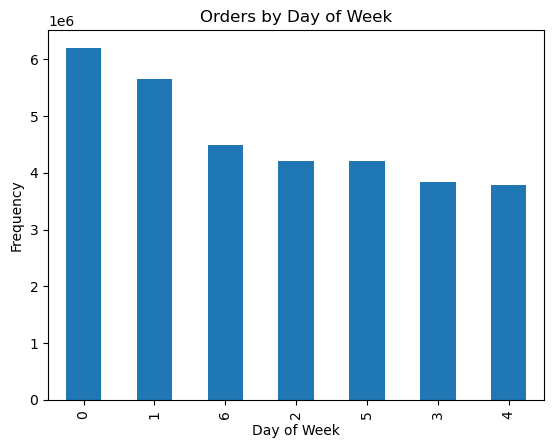

In [15]:
# create a dataframe out of the orders_day_of_week

df['order_day_of_week'].value_counts().plot.bar()

plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

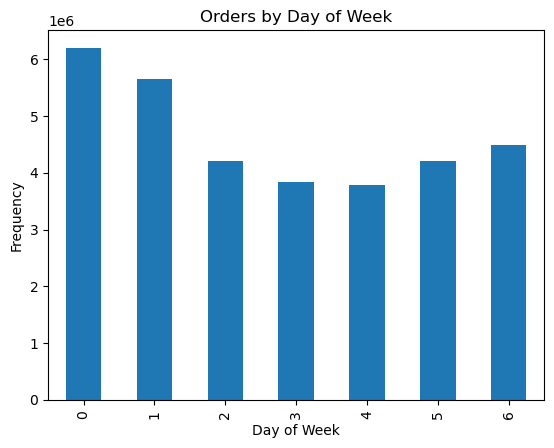

In [16]:
# instead of biggest to smallest, sort by index number: 

df['order_day_of_week'].value_counts().sort_index().plot.bar()

plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

##### it is possible to also use the .sort_index() when filtering frequencies: 

##### ords_prods_merge['order_day_of_week'].value_counts() - normal

##### ords_prods_merge['order_day_of_week'].value_counts().sort_index() - filtered by index

Text(0, 0.5, 'Frequency')

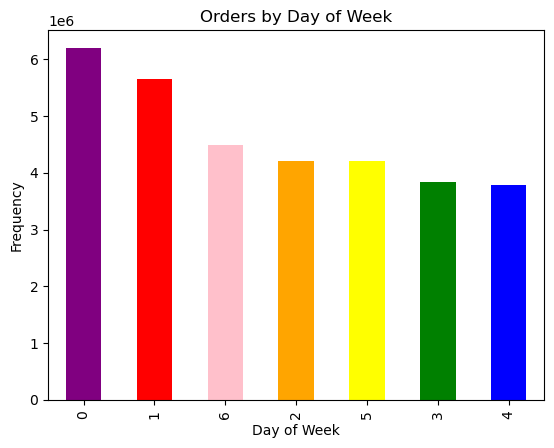

In [17]:
# to add colors just specify it inside the brackets

bar = df['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

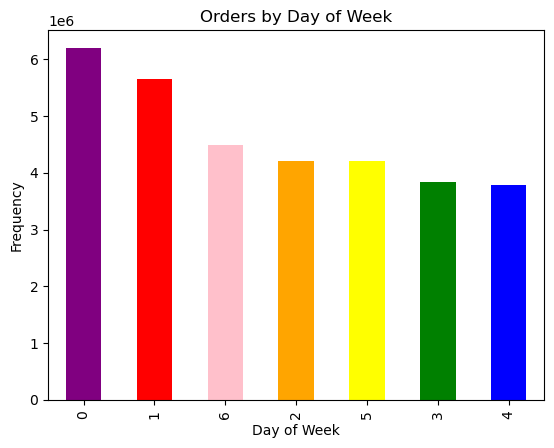

In [18]:
# now that the chart is saved inside the bar object, is it possible to call it whenever necessary through:

bar.figure

In [19]:
# save the bar chart in the visualization folder

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9','bar_orders_dow.png'))

### 02. Histogram

Text(0, 0.5, 'Frequency')

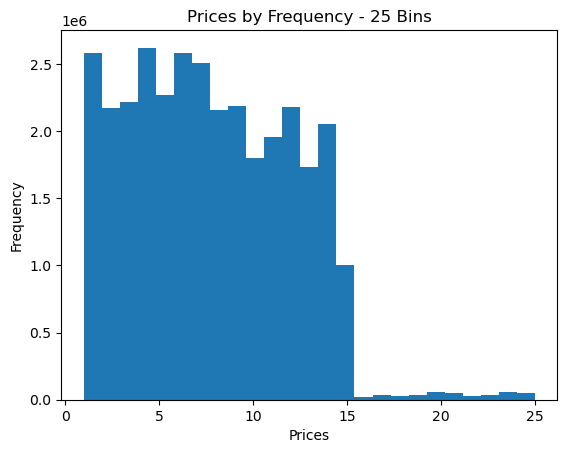

In [20]:
# create a histogram of the 'prices' column

hist = df['prices'].plot.hist(bins = 25)

plt.title('Prices by Frequency - 25 Bins')
plt.xlabel('Prices')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

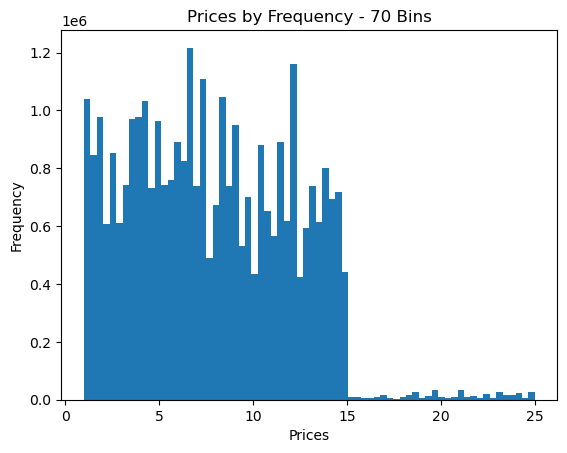

In [21]:
hist_2 = df['prices'].plot.hist(bins=70)

plt.title('Prices by Frequency - 70 Bins')
plt.xlabel('Prices')
plt.ylabel('Frequency')

In [22]:
# save the histogram (25 bins) in the visualization folder

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9','hist_price_frequency_25.png'))

In [23]:
# save the histogram (70 bins) in the visualization folder

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9','hist_price_frequency_70.png'))

### 03. Scatterplot

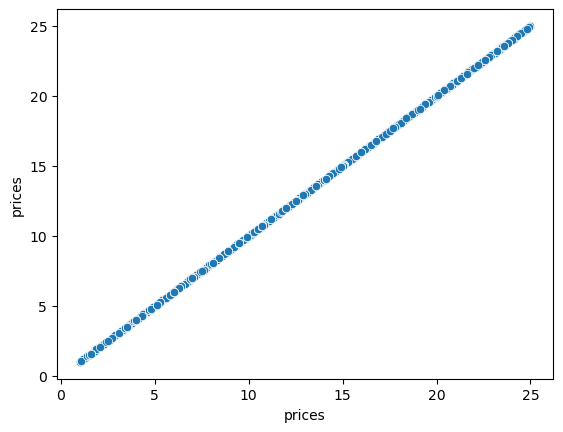

In [24]:
# create a scatterplot

scatt = sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [25]:
# Save the scatterplot in the visualization folder

scatt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9','scatt_price.png'))

### 04. Line Chart

#### Sampling Data

In [26]:
# create a sample with a ratio of 70/30:

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [27]:
# split the dataframe into two samples. store 70% im the first sample and the rest (30%) in the second

big = df[dev]
small = df[~dev]

In [28]:
# check the length of the whole datarame

len(df)

32404859

In [29]:
# check if the sum of both subset result in the same length

len(big) + len(small)

32404859

In [30]:
# create a dataframe using only the necessary columns in the small sample 

df_2 = small[['order_day_of_week', 'prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Prices')

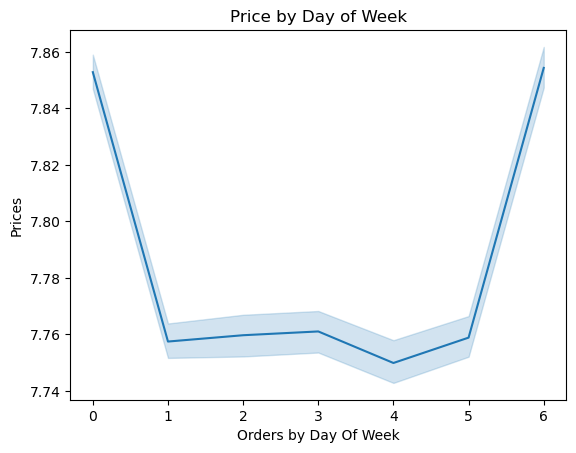

In [31]:
# create a line plot using the small sample as base

line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

plt.title('Price by Day of Week')
plt.xlabel('Orders by Day Of Week')
plt.ylabel('Prices')

In [32]:
# now asign only the necessary columns from the dataframe 

df_4 = df[['order_day_of_week','prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Prices')

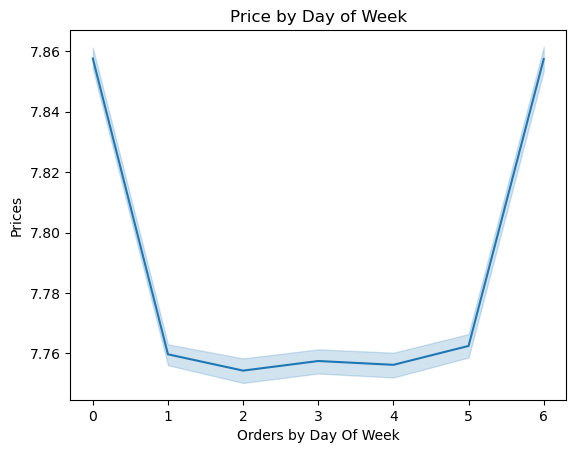

In [33]:
# compare if both lines are similar 

line_2 = sns.lineplot(data = df_4, x = 'order_day_of_week',y = 'prices')

plt.title('Price by Day of Week')
plt.xlabel('Orders by Day Of Week')
plt.ylabel('Prices')

In [34]:
# save the line (small sample) in the visualization folder

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9','line_odw_smallsample_price.png'))

In [35]:
# save the line (dataframe) in the visualization folder

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.9', 'line_odw_df_price.png'))

## 03. Creating a Histogram: Sales and order_hour_of_day

Text(0, 0.5, 'Frequency')

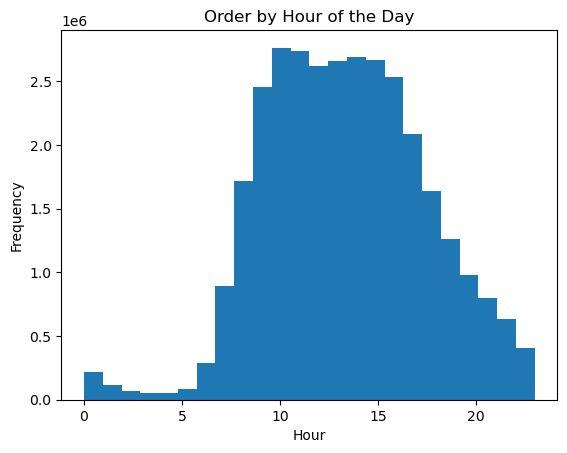

In [7]:
hist_3 = df['order_hour_of_day'].plot.hist(bins = 24)

plt.title('Order by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Frequency')

##### As can be seen above, the hour of the day that Instacart sales the most is between 10am and 3pm, while between 01 am and 5 am is the least busy time. 

In [8]:
hist_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9', 'hist_sales_by_hour.png'))

## 04. Distribution of orders among customers in terms of loyalty

<Figure size 800x600 with 0 Axes>

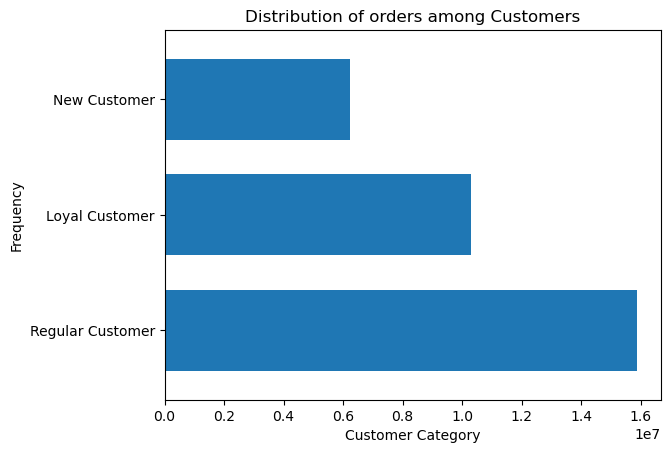

<Figure size 800x600 with 0 Axes>

In [56]:
# create a bar chart using the loyalty_flag columns 

barh_distribution = df['loyalty_flag'].value_counts().plot.barh()

plt.title('Distribution of orders among Customers')
plt.xlabel('Customer Category')
plt.ylabel('Frequency')


In [57]:
# save the visualization in the corresponding folder

barh_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9', 'bar_distribution_loyalty.png'))

## 05. Difference in expenditure based on the hour of the day

In [40]:
# check all the column in the dataframe

df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_order', 'spending_flag', 'median_prior_order',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'us_state',
       'age', 'date_joined', 'n_dependants', 'marital_status', 'income',
       '_merge'],
      dtype='object')

In [41]:
# create a new dataframe using the small subset - since it seems accurate compared to the whole dataframe 

df_expenditure_hour = small[['order_hour_of_day', 'prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Prices')

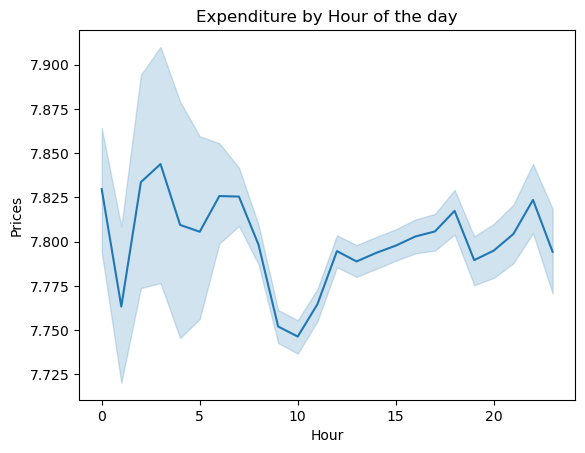

In [42]:
# Create a line chart based on the small subset (columns order_hour_of_day and prices) defined earlier 

line_expenditure_hour = sns.lineplot(data = df_expenditure_hour, x = 'order_hour_of_day',y = 'prices')

plt.title('Expenditure by Hour of the day')
plt.xlabel('Hour')
plt.ylabel('Prices')

In [43]:
# save the visualization in the corresponding folder

line_expenditure_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9', 'line_expenditure_hour.png'))

## 06. Connection between age and family (line)

In [44]:
# create a new dataframe using the small subset - since it seems accurate compared to the whole dataframe 

df_age_family = small[['age', 'n_dependants']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Family Members')

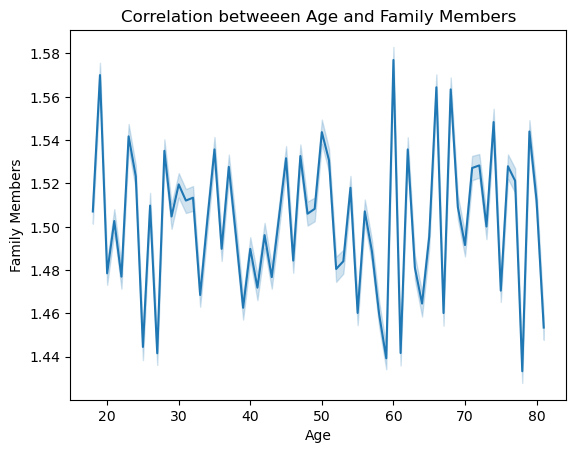

In [45]:
# Create a line chart based on the small subset (columns age and n_dependants) defined earlier 

line_age_family = sns.lineplot(data = df_age_family, x = 'age',y = 'n_dependants')

plt.title('Correlation betweeen Age and Family Members')
plt.xlabel('Age')
plt.ylabel('Family Members')

##### As can be seen above, there is no correlation between age and number of dependants. 

In [46]:
# save the visualization in the corresponding folder

line_age_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9','line_age_family.png'))

## 07. Connection between age and income (scatterplot)

In [47]:
# create a new dataframe using the small subset - since it seems accurate compared to the whole dataframe 

df_age_income = small[['age', 'income']]

Text(0, 0.5, 'Income')

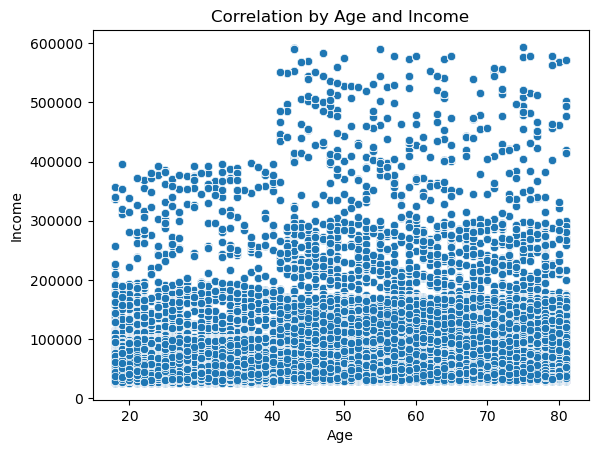

In [48]:
# Create a scatterplot based on the small subset (columns age and income) defined earlier 

scatt_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_age_income)

plt.title('Correlation by Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')

##### According to the scatterplot above, all ages have a high representation from 0 to 200,000 of income. But, it is possible to notice that people above 40+ years old also have a high density, with a high number of people earning around 300,000. Lastly, importing to point out that people from 20 - 40 years have outliers that go until 400,000, while poeple above 40 years until 80, have outlier that go until 600,000, showing that there is a correlation between age and income. 

In [49]:
# save the visualization in the corresponding folder

scatt_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9','scatt_age_income.png'))